# User Overview Analysis

In [1]:
import os
notebook_dir = os.getcwd()
parent_path=os.path.dirname(notebook_dir)

os.chdir(parent_path)

# import sys
# import os
# sys.path.append(os.path.abspath('../scripts'))

In [2]:
from script.user_overview_analyzer import OverviewAnalyser

In [3]:
#acces the data loaded from database
import pickle
with open('variable.pickle','rb') as file:
    xdr_data= pickle.load(file)

### Check missing values

In [4]:
analyzer=OverviewAnalyser()

In [5]:
analyzer.missing_value(xdr_data)

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

### Drop columns that have null value more than half of the whole data

In [6]:
xdr_data= xdr_data.drop(columns=['TCP DL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)','HTTP DL (Bytes)','HTTP UL (Bytes)','Nb of sec with 125000B < Vol DL','Nb of sec with 1250B < Vol UL < 6250B','Nb of sec with 31250B < Vol DL < 125000B','Nb of sec with 37500B < Vol UL','Nb of sec with 6250B < Vol DL < 31250B','Nb of sec with 6250B < Vol UL < 37500B',])

### Replace the missing values with mean or mode based on their data type

In [7]:
xdr_data= analyzer.replace_with_mean_or_mode(xdr_data)

g:\Programming\10_Academy\Week_02\Telecom_Company_Users_Data_Analytics\script\user_overview_analyzer.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col]=data[col].fillna(mode_value) # Replace NaN with mode
g:\Programming\10_Academy\Week_02\Telecom_Company_Users_Data_Analytics\script\user_overview_analyzer.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col]=data[col].fillna(mean_value)  # Replace NaN with mean


### Top 10 handsets used by the customers.

In [8]:
analyzer.rank(xdr_data,'Handset Type',10)

Handset Type
Huawei B528S-23A                19754
Apple iPhone 6S (A1688)          9401
Apple iPhone 6 (A1586)           9004
undefined                        8960
Apple iPhone 7 (A1778)           6301
Apple iPhone Se (A1723)          5176
Apple iPhone 8 (A1905)           4985
Apple iPhone Xr (A2105)          4562
Samsung Galaxy S8 (Sm-G950F)     4504
Apple iPhone X (A1901)           3809
Name: count, dtype: int64

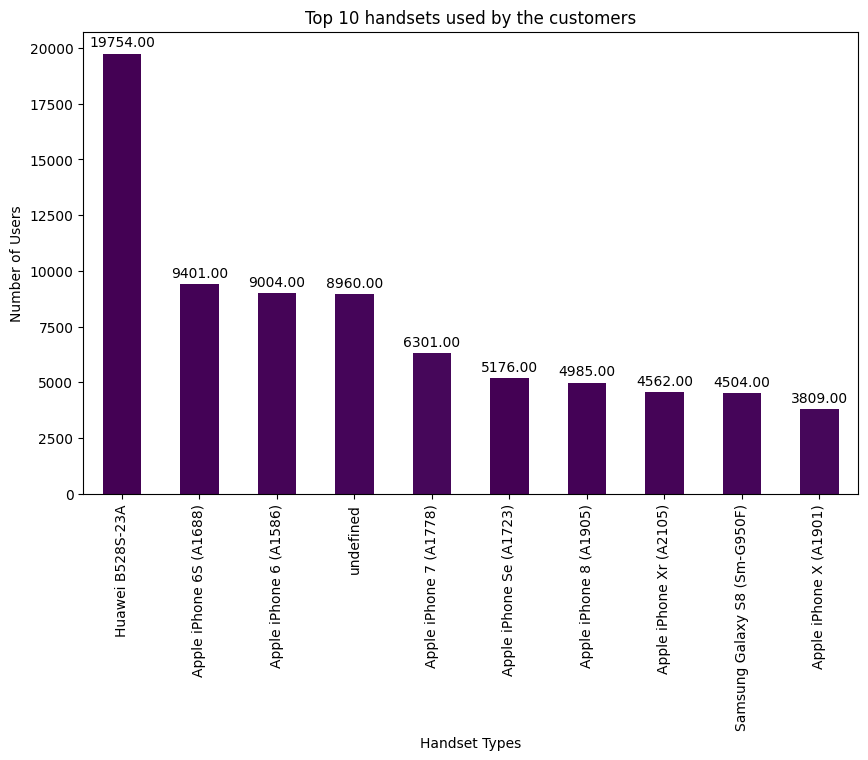

In [9]:
#plot of Top 10 handsets used by the customers
analyzer.rank_bar_plot(xdr_data,'Handset Type','Top 10 handsets used by the customers','Handset Types','Number of Users',10)

### Top 3 handset manufacturers

In [10]:
analyzer.rank(xdr_data,'Handset Manufacturer',3)

Handset Manufacturer
Apple      59442
Samsung    40689
Huawei     34353
Name: count, dtype: int64

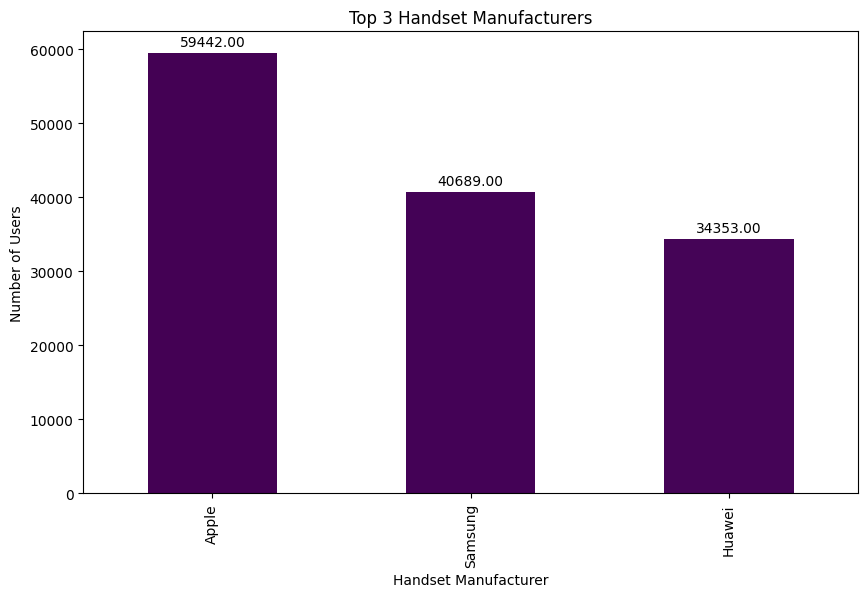

In [11]:
#plot of Top 3 handset manufacturers
analyzer.rank_bar_plot(xdr_data,'Handset Manufacturer','Top 3 Handset Manufacturers','Handset Manufacturer','Number of Users',3)

### Top 5 handsets per top 3 handset manufacturer

In [12]:
analyzer.top_handsets_by_manufacturer(xdr_data)

,Handset Manufacturer,Handset Type,count
60,Apple,Apple iPhone 6S (A1688),9401
56,Apple,Apple iPhone 6 (A1586),9004
66,Apple,Apple iPhone 7 (A1778),6301
80,Apple,Apple iPhone Se (A1723),5176
73,Apple,Apple iPhone 8 (A1905),4985
316,Huawei,Huawei B528S-23A,19752
337,Huawei,Huawei E5180,2079
416,Huawei,Huawei P20 Lite Huawei Nova 3E,2015
415,Huawei,Huawei P20,1476
456,Huawei,Huawei Y6 2018,996


### Aggregiate Per User
**Grouping Users by 'IMSI' since it is unique for each user**

In [13]:
analyzer.aggregate_xdr_data(xdr_data)

,IMSI,num_sessions,total_duration,total_dl_data,total_ul_data,social_media_dl,social_media_ul,google_dl,google_ul,email_dl,email_ul,youtube_dl,youtube_ul,netflix_dl,netflix_ul,gaming_dl,gaming_ul,other_dl,other_ul
0,2.040471e+14,1,869844.0,78697597.0,60456049.0,1500145.0,45943.0,5985089.0,3233558.0,2518425.0,812549.0,18980320.0,21960390.0,21621336.0,7224894.0,28092282.0,14977978.0,3.891597e+08,12200737.0
1,2.040808e+14,1,877385.0,194828056.0,37295915.0,668596.0,46628.0,8572779.0,1865881.0,842279.0,678492.0,9839889.0,2120016.0,10340908.0,16251392.0,164563605.0,13485133.0,4.676781e+08,2848373.0
2,2.082001e+14,1,86019.0,31376981.0,53794658.0,3073697.0,49084.0,603691.0,1020971.0,3076735.0,580766.0,5556563.0,14325876.0,15305361.0,16525201.0,3760934.0,5363582.0,5.000445e+08,15929178.0
3,2.082001e+14,1,86254.0,392918313.0,33583272.0,2542767.0,34337.0,10699827.0,3111651.0,3248863.0,606871.0,22414714.0,3242918.0,10065639.0,17720213.0,343946503.0,159394.0,3.009029e+08,8707888.0
4,2.082001e+14,2,573923.0,961767023.0,71325004.0,3326811.0,99905.0,9118088.0,2547799.0,4225757.0,1338705.0,4046597.0,9793604.0,30748449.0,26594966.0,910301321.0,7383445.0,1.055869e+09,23566580.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106875,2.082099e+14,1,127367.0,688815403.0,33888182.0,1209387.0,47216.0,8114248.0,3933358.0,845456.0,110856.0,8661662.0,2959812.0,5726631.0,5040884.0,664258019.0,14235971.0,5.808342e+08,7560085.0
106876,2.082099e+14,1,168543.0,451173021.0,44692550.0,3462783.0,2972.0,661679.0,3626134.0,1531947.0,752619.0,23251957.0,11605503.0,14193266.0,16541988.0,408071389.0,3311290.0,7.437719e+08,8852044.0
106877,2.082099e+14,1,86399.0,307825104.0,30355487.0,2601607.0,8059.0,1612388.0,2815546.0,1405783.0,311862.0,22196893.0,6993803.0,15051715.0,4554026.0,264956718.0,7089918.0,4.481531e+08,8582273.0
106878,2.082522e+14,1,56613.0,800629358.0,45083854.0,621586.0,45495.0,1208403.0,1019102.0,3023466.0,31158.0,12776130.0,12133368.0,9816072.0,1098136.0,773183701.0,15385758.0,5.791097e+08,15370837.0
